In [125]:
#pip install openmeteo-requests
#pip install requests-cache retry-requests numpy pandas
#pip install pmdarima

In [126]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

In [127]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 10.823,
	"longitude": 106.6296,
	"start_date": "1994-10-24",
	"end_date": "2024-10-24",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"],
	"timezone": "GMT"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(28).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(29).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm

hourly_dataframe = pd.DataFrame(data = hourly_data)

Coordinates 10.790861129760742°N 106.63130187988281°E
Elevation 6.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [128]:
hourly_dataframe.shape 

(263016, 31)

In [129]:
hourly_dataframe.to_csv('data.csv', index= False)

In [130]:
hourly_dataframe.shape

(263016, 31)

In [131]:
print(hourly_dataframe.isnull())

         date  temperature_2m  relative_humidity_2m  dew_point_2m  \
0       False           False                 False         False   
1       False           False                 False         False   
2       False           False                 False         False   
3       False           False                 False         False   
4       False           False                 False         False   
...       ...             ...                   ...           ...   
263011  False           False                 False         False   
263012  False           False                 False         False   
263013  False           False                 False         False   
263014  False           False                 False         False   
263015  False           False                 False         False   

        apparent_temperature  precipitation   rain  snowfall  snow_depth  \
0                      False          False  False     False       False   
1                  

## Covert date to datetime, check null values and drop unessary columns 

In [132]:
#Convert [Date] to datetime
hourly_dataframe['date'] = pd.to_datetime(hourly_dataframe['date'])
hourly_dataframe.set_index('date', inplace=True)

In [133]:
hourly_dataframe.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
date,,,,,,,,,,,,,,,,,,,,,
1994-10-24 00:00:00+00:00,21.624001,77.029335,17.424002,22.588707,0.0,0.0,0.0,0.0,1.0,1011.599976,...,339.102173,19.799999,22.724001,25.774000,28.274000,28.574001,0.411,0.450,0.448,0.489
1994-10-24 01:00:00+00:00,23.424002,69.488853,17.524000,24.268637,0.0,0.0,0.0,0.0,1.0,1012.400024,...,336.501404,23.400000,24.624001,25.774000,28.224001,28.574001,0.410,0.450,0.448,0.489
1994-10-24 02:00:00+00:00,24.774000,65.097763,17.774000,25.491077,0.0,0.0,0.0,0.0,1.0,1012.700012,...,343.201538,25.919998,26.074001,25.824001,28.224001,28.574001,0.408,0.449,0.447,0.489
1994-10-24 03:00:00+00:00,25.924002,62.343075,18.174002,27.123587,0.0,0.0,0.0,0.0,1.0,1012.799988,...,346.701416,27.719999,27.524000,25.924002,28.224001,28.574001,0.405,0.448,0.447,0.489
1994-10-24 04:00:00+00:00,26.774000,61.562996,18.774000,28.654068,0.0,0.0,0.0,0.0,1.0,1011.900024,...,340.942200,28.080000,28.624001,26.124001,28.224001,28.574001,0.401,0.448,0.447,0.488


In [134]:
hourly_dataframe.reset_index(inplace=True)
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,17.424002,22.588707,0.0,0.0,0.0,0.0,1.0,...,339.102173,19.799999,22.724001,25.774000,28.274000,28.574001,0.411,0.450,0.448,0.489
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,17.524000,24.268637,0.0,0.0,0.0,0.0,1.0,...,336.501404,23.400000,24.624001,25.774000,28.224001,28.574001,0.410,0.450,0.448,0.489
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,17.774000,25.491077,0.0,0.0,0.0,0.0,1.0,...,343.201538,25.919998,26.074001,25.824001,28.224001,28.574001,0.408,0.449,0.447,0.489
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,18.174002,27.123587,0.0,0.0,0.0,0.0,1.0,...,346.701416,27.719999,27.524000,25.924002,28.224001,28.574001,0.405,0.448,0.447,0.489
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,18.774000,28.654068,0.0,0.0,0.0,0.0,1.0,...,340.942200,28.080000,28.624001,26.124001,28.224001,28.574001,0.401,0.448,0.447,0.488


In [135]:
hourly_dataframe = hourly_dataframe.drop(columns=['snow_depth'] )
hourly_dataframe.to_csv('data.csv', index=False)
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,weather_code,pressure_msl,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,17.424002,22.588707,0.0,0.0,0.0,1.0,1011.599976,...,339.102173,19.799999,22.724001,25.774000,28.274000,28.574001,0.411,0.450,0.448,0.489
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,17.524000,24.268637,0.0,0.0,0.0,1.0,1012.400024,...,336.501404,23.400000,24.624001,25.774000,28.224001,28.574001,0.410,0.450,0.448,0.489
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,17.774000,25.491077,0.0,0.0,0.0,1.0,1012.700012,...,343.201538,25.919998,26.074001,25.824001,28.224001,28.574001,0.408,0.449,0.447,0.489
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,18.174002,27.123587,0.0,0.0,0.0,1.0,1012.799988,...,346.701416,27.719999,27.524000,25.924002,28.224001,28.574001,0.405,0.448,0.447,0.489
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,18.774000,28.654068,0.0,0.0,0.0,1.0,1011.900024,...,340.942200,28.080000,28.624001,26.124001,28.224001,28.574001,0.401,0.448,0.447,0.488


In [136]:
missing_data = hourly_dataframe.isnull().sum()
print(missing_data)

date                             0
temperature_2m                   0
relative_humidity_2m             0
dew_point_2m                     0
apparent_temperature             0
precipitation                    0
rain                             0
snowfall                         0
weather_code                     0
pressure_msl                     0
surface_pressure                 0
cloud_cover                      0
cloud_cover_low                  0
cloud_cover_mid                  0
cloud_cover_high                 0
et0_fao_evapotranspiration       0
vapour_pressure_deficit          0
wind_speed_10m                   0
wind_speed_100m                  0
wind_direction_10m               0
wind_direction_100m              0
wind_gusts_10m                   0
soil_temperature_0_to_7cm        0
soil_temperature_7_to_28cm       0
soil_temperature_28_to_100cm     0
soil_temperature_100_to_255cm    0
soil_moisture_0_to_7cm           0
soil_moisture_7_to_28cm          0
soil_moisture_28_to_

In [137]:
hourly_dataframe = hourly_dataframe.drop(columns=['apparent_temperature','dew_point_2m','snowfall','weather_code','wind_speed_100m','wind_direction_100m','cloud_cover_mid','cloud_cover_high',] )
hourly_dataframe.to_csv('data.csv', index=False)
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,wind_direction_10m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,330.255219,19.799999,22.724001,25.774000,28.274000,28.574001,0.411,0.450,0.448,0.489
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,334.885193,23.400000,24.624001,25.774000,28.224001,28.574001,0.410,0.450,0.448,0.489
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,342.474335,25.919998,26.074001,25.824001,28.224001,28.574001,0.408,0.449,0.447,0.489
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,344.623688,27.719999,27.524000,25.924002,28.224001,28.574001,0.405,0.448,0.447,0.489
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,339.443878,28.080000,28.624001,26.124001,28.224001,28.574001,0.401,0.448,0.447,0.488


In [138]:
hourly_dataframe.describe()

,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,vapour_pressure_deficit,...,wind_direction_10m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
count,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,...,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000,263016.000000
mean,27.156460,78.704582,0.222351,0.222351,1009.536194,1008.847229,44.728573,14.998111,0.171616,0.860021,...,182.385834,18.080791,29.989246,29.881811,29.828999,29.791687,0.324418,0.398766,0.418135,0.466926
std,2.931305,15.636395,0.796020,0.796020,2.365546,2.362619,27.264256,20.265663,0.217045,0.783794,...,85.532722,8.987675,4.599124,2.301071,1.729997,1.235032,0.162777,0.083750,0.060151,0.025624
min,15.924000,20.063433,0.000000,0.000000,999.400024,998.720581,0.000000,0.000000,0.000000,0.000000,...,0.954824,0.720000,18.074001,22.324001,25.424002,27.424002,0.027000,0.264000,0.312000,0.411000
25%,24.974001,69.443640,0.000000,0.000000,1007.900024,1007.214050,26.100000,1.000000,0.000000,0.266432,...,125.537766,10.799999,26.711000,28.261000,28.574001,28.874001,0.134000,0.309000,0.362000,0.446000
50%,26.524000,82.274921,0.000000,0.000000,1009.500000,1008.804199,40.200001,8.000000,0.046977,0.611251,...,173.290253,16.919998,28.724001,29.324001,29.361000,29.524000,0.413000,0.434000,0.424000,0.469000
75%,29.124001,91.696320,0.100000,0.100000,1011.099976,1010.405212,62.099998,20.000000,0.323719,1.206063,...,242.592499,23.759998,32.073997,31.224001,30.874001,30.574001,0.465000,0.475000,0.474000,0.489000
max,39.160999,100.000000,22.299999,22.299999,1020.700012,1019.997070,100.000000,100.000000,0.905528,5.410378,...,360.000000,66.599998,51.310997,39.560997,36.760998,34.160999,0.522000,0.520000,0.520000,0.520000


In [139]:
hourly_dataframe.shape 

(263016, 22)

## Calculate and insert the daily-monthly-yearly average temperatures into dataframe


In [140]:
import pandas as pd

# Ensure the date column is in datetime format
hourly_dataframe['date'] = pd.to_datetime(hourly_dataframe['date'])

# Extract the year and month for grouping
hourly_dataframe['Year'] = hourly_dataframe['date'].dt.year
hourly_dataframe['Month'] = hourly_dataframe['date'].dt.month
hourly_dataframe['Day'] = hourly_dataframe['date'].dt.day

# Calculate yearly average temperature and merge it back
yearly_avg_temp_df = hourly_dataframe.groupby('Year')['temperature_2m'].mean().reset_index()
yearly_avg_temp_df.rename(columns={'temperature_2m': 'yearly_avg_temp'}, inplace=True)
hourly_dataframe = hourly_dataframe.merge(yearly_avg_temp_df, on='Year', how='left')

# Calculate monthly average temperature and merge it back
monthly_avg_temp_df = hourly_dataframe.groupby(['Year', 'Month'])['temperature_2m'].mean().reset_index()
monthly_avg_temp_df.rename(columns={'temperature_2m': 'monthly_avg_temp'}, inplace=True)
hourly_dataframe = hourly_dataframe.merge(monthly_avg_temp_df, on=['Year', 'Month'], how='left')

#save the updated DataFrame to a CSV file
hourly_dataframe.to_csv('data.csv', index=False)

# Display the updated DataFrame
hourly_dataframe.head()


,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,Year,Month,Day,yearly_avg_temp,monthly_avg_temp
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,28.574001,0.411,0.450,0.448,0.489,1994,10,24,26.269863,24.320616
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,28.574001,0.410,0.450,0.448,0.489,1994,10,24,26.269863,24.320616
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,28.574001,0.408,0.449,0.447,0.489,1994,10,24,26.269863,24.320616
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,28.574001,0.405,0.448,0.447,0.489,1994,10,24,26.269863,24.320616
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,28.574001,0.401,0.448,0.447,0.488,1994,10,24,26.269863,24.320616


## Calculate mothly avg preciption and humidity 

In [141]:
# Calculate monthly average humidity
monthly_avg_hum_df = hourly_dataframe.groupby(['Year', 'Month'])['relative_humidity_2m'].mean().reset_index()
monthly_avg_hum_df.rename(columns={'relative_humidity_2m': 'monthly_avg_hum'}, inplace=True)
hourly_dataframe = hourly_dataframe.merge(monthly_avg_hum_df, on=['Year', 'Month'], how='left')

# Calculate monthly average precipitation
monthly_avg_prec_df = hourly_dataframe.groupby(['Year', 'Month'])['precipitation'].mean().reset_index()
monthly_avg_prec_df.rename(columns={'precipitation': 'monthly_avg_prec'}, inplace=True)
hourly_dataframe = hourly_dataframe.merge(monthly_avg_prec_df, on=['Year', 'Month'], how='left')

hourly_dataframe.to_csv('data.csv', index=False)

hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,Year,Month,Day,yearly_avg_temp,monthly_avg_temp,monthly_avg_hum,monthly_avg_prec
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,0.450,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,0.450,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,0.449,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,0.448,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,0.448,0.447,0.488,1994,10,24,26.269863,24.320616,85.29464,0.469271


In [142]:
# Calculate daily average temperature and merge it back
daily_avg_temp_df = hourly_dataframe.groupby(['Year', 'Month','Day'])['temperature_2m'].mean().reset_index()
daily_avg_temp_df.rename(columns={'temperature_2m': 'daily_avg_temp'}, inplace=True)
hourly_dataframe = hourly_dataframe.merge(daily_avg_temp_df, on=['Year', 'Month','Day'], how='left')


In [143]:
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,Year,Month,Day,yearly_avg_temp,monthly_avg_temp,monthly_avg_hum,monthly_avg_prec,daily_avg_temp
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,0.447,0.488,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583


In [144]:
import pandas as pd

hourly_dataframe['date'] = pd.to_datetime(hourly_dataframe['date'])
hourly_dataframe['Year'] = hourly_dataframe['date'].dt.year
yearly_avg_temp_df = hourly_dataframe.groupby('Year')['temperature_2m'].mean().reset_index()
yearly_avg_temp_df.rename(columns={'temperature_2m': 'yearly_avg_temp'}, inplace=True)
# yearly_avg_temp_df.to_csv('data.csv', index=False)
# Hiển thị DataFrame mới
hourly_dataframe.head()
# print(yearly_avg_temp_df)


,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,Year,Month,Day,yearly_avg_temp,monthly_avg_temp,monthly_avg_hum,monthly_avg_prec,daily_avg_temp
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,0.447,0.488,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583


In [145]:
hourly_dataframe.shape 

(263016, 30)

In [146]:
hourly_dataframe.to_csv('data.csv', index=False)

## Yearly Average Temperature

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

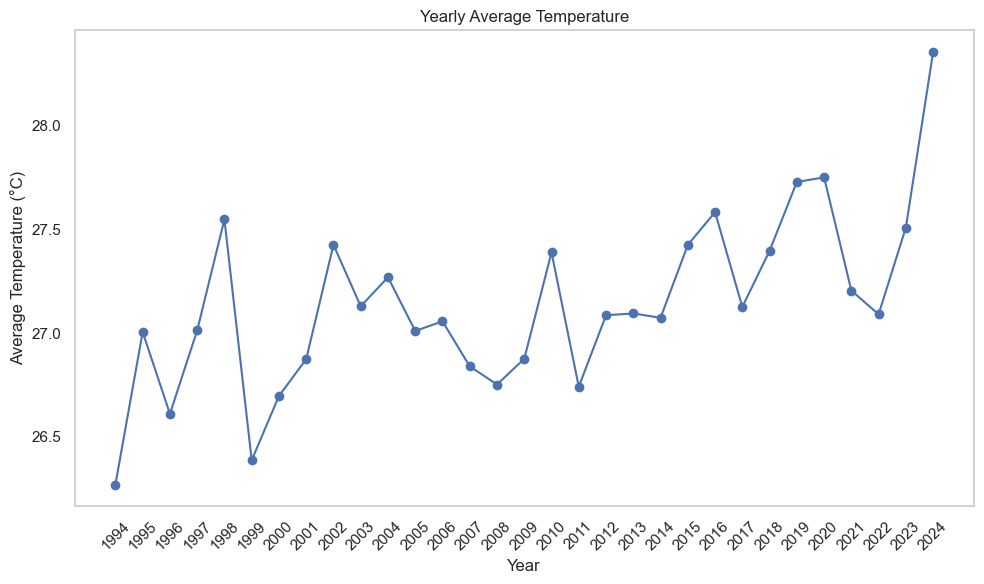

In [148]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp_df['Year'], yearly_avg_temp_df['yearly_avg_temp'], marker='o')

# Thêm tiêu đề và nhãn trục
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid()
plt.xticks(yearly_avg_temp_df['Year'], rotation=45)  # Xoay nhãn năm nếu cần

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

The chart above illustrates the yearly average temperature trend over time. Observing the chart, we can see a general increase in temperature over the years, with some noticeable fluctuations in specific periods.

From 1994 to around 2005: The average annual temperature shows significant fluctuations, with several sharp decreases and increases, indicating an unstable temperature trend during this period.
From 2005 to 2015: The temperature becomes somewhat more stable, with consecutive years showing similar average levels. This might suggest a period of relative climate stability compared to the previous years.
From 2015 to 2024: There is a clear upward trend, with the average temperature rising more sharply, especially in 2024, which records the highest peak on the chart. This could be indicative of global warming effects or other environmental factors influencing the climate.
Overall, the chart suggests a marked rise in temperature in the most recent decade, which may impact ecosystems and the living conditions of affected regions.

In [149]:
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,Year,Month,Day,yearly_avg_temp,monthly_avg_temp,monthly_avg_hum,monthly_avg_prec,daily_avg_temp
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,0.447,0.488,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583


## Monthly Correlation of Temperature and Precipitation in 2023

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử DataFrame của bạn đã có cột 'date', 'temperature_2m', và 'precipitation'
# Đảm bảo cột 'date' là kiểu datetime để dễ dàng trích xuất năm và tháng
hourly_dataframe['date'] = pd.to_datetime(hourly_dataframe['date'])

# Lọc dữ liệu cho năm 2023
df_2023 = hourly_dataframe[hourly_dataframe['date'].dt.year == 2023]

# Tính nhiệt độ trung bình và tổng lượng mưa theo từng tháng
monthly_data = df_2023.groupby(df_2023['date'].dt.month).agg({
    'temperature_2m': 'mean',  # Nhiệt độ trung bình theo tháng
    'precipitation': 'sum'     # Tổng lượng mưa theo tháng
}).reset_index()

# Đổi tên cột cho dễ đọc
monthly_data.rename(columns={'date': 'Month', 'temperature_2m': 'Avg_Temperature', 'precipitation': 'Total_Precipitation'}, inplace=True)



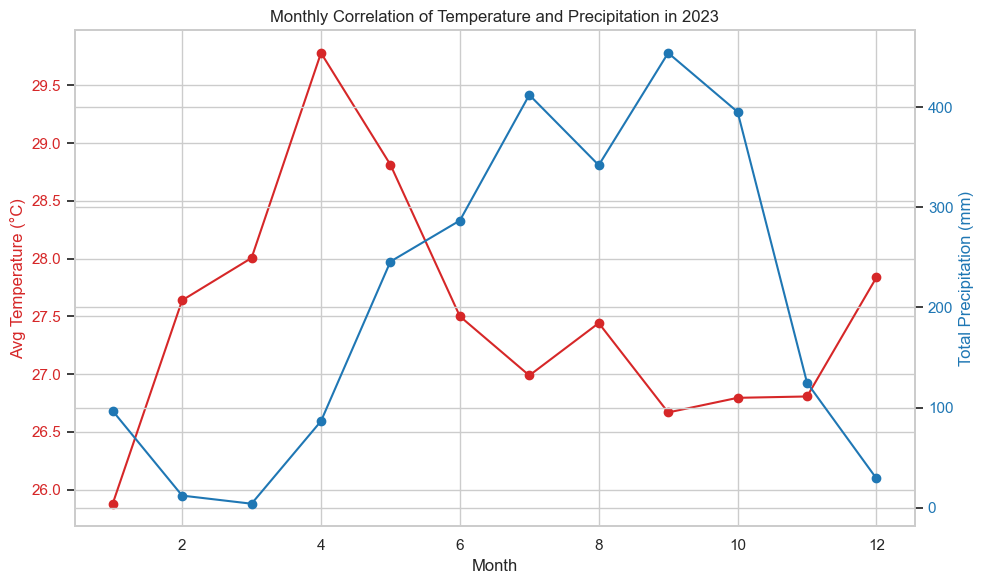

In [151]:
# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Vẽ đường biểu diễn nhiệt độ trung bình
ax1.plot(monthly_data['Month'], monthly_data['Avg_Temperature'], color='tab:red', marker='o', label='Avg Temperature (°C)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Thêm trục Y thứ hai để biểu diễn lượng mưa
ax2 = ax1.twinx()
ax2.plot(monthly_data['Month'], monthly_data['Total_Precipitation'], color='tab:blue', marker='o', label='Total Precipitation (mm)')
ax2.set_ylabel('Total Precipitation (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Thêm tiêu đề và hiển thị biểu đồ
plt.title('Monthly Correlation of Temperature and Precipitation in 2023')
fig.tight_layout()
plt.show()


The chart shows the monthly correlation between average temperature and total precipitation for 2023. The red line represents the average temperature in degrees Celsius, while the blue line represents total monthly precipitation in millimeters.

From January to April, both temperature and precipitation exhibit an upward trend, with temperatures peaking in April, reaching nearly 30°C. During this period, precipitation also shows significant increases, especially in April, suggesting a warm and wet start to the year.

In the mid-year months (May to August), the temperature decreases slightly but remains high, fluctuating around 27–28°C. Precipitation, however, continues to rise, reaching its peak in July, then gradually declines. This indicates that, while temperatures remained stable, rainfall was at its highest in the middle of the year, possibly due to seasonal monsoon effects.

Toward the end of the year (September to December), there is a steady decline in both temperature and precipitation. By December, temperatures drop to the lowest levels of the year, around 26°C, and precipitation also reaches its minimum. This downward trend aligns with the end of the rainy season and cooler months.

Overall, the chart reveals a clear seasonal pattern, where temperature and precipitation peak around mid-year and then taper off toward the year's end.

## 5 Days with highest temperature, humidity and precipitation in 2022 and 2023


In [152]:
import pandas as pd

# Giả sử bạn đã có DataFrame weather_data với các cột 'date', 'temperature_2m', 'precipitation', 'relative_humidity_2m'
# Đảm bảo cột 'date' là datetime
hourly_dataframe['date'] = pd.to_datetime(hourly_dataframe['date'])

# Lọc dữ liệu cho năm 2022 và 2023
filtered_data = hourly_dataframe[hourly_dataframe['date'].dt.year.isin([2022, 2023])]

# Thêm cột 'year' và 'month' để dễ dàng nhóm theo tháng
filtered_data['year'] = filtered_data['date'].dt.year
filtered_data['month'] = filtered_data['date'].dt.month

# Tính trung bình nhiệt độ và độ ẩm, tổng lượng mưa theo tháng
monthly_stats = filtered_data.groupby(['year', 'month']).agg({
    'temperature_2m': 'mean',
    'precipitation': 'sum',
    'relative_humidity_2m': 'mean'
}).reset_index()

# Tìm 5 tháng của năm 2022 và 2023 có nhiệt độ trung bình cao nhất
top_5_temp = monthly_stats.nlargest(5, 'temperature_2m')

# Tìm 5 tháng của năm 2022 và 2023 có lượng mưa tổng cộng cao nhất
top_5_precip = monthly_stats.nlargest(5, 'precipitation')

# Tìm 5 tháng của năm 2022 và 2023 có độ ẩm trung bình cao nhất
top_5_humidity = monthly_stats.nlargest(5, 'relative_humidity_2m')


C:\Users\TanPhat\AppData\Local\Temp\ipykernel_18004\2103632765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['date'].dt.year
C:\Users\TanPhat\AppData\Local\Temp\ipykernel_18004\2103632765.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['date'].dt.month


In [153]:
print("Top 5 months with highest average temperature in 2022 and 2023:")
print(top_5_temp)

print("Top 5 months with highest total precipitation in 2022 and 2023:")
print(top_5_precip)

print("Top 5 months with highest average humidity in 2022 and 2023:")
print(top_5_humidity)


Top 5 months with highest average temperature in 2022 and 2023:
    year  month  temperature_2m  precipitation  relative_humidity_2m
15  2023      4       29.780792      86.400002             70.447113
16  2023      5       28.812746     245.800003             79.225098
2   2022      3       28.570005      88.099998             69.985939
1   2022      2       28.454525      30.700001             64.509239
14  2023      3       28.005959       3.900000             64.292435
Top 5 months with highest total precipitation in 2022 and 2023:
    year  month  temperature_2m  precipitation  relative_humidity_2m
20  2023      9       26.668501     454.200012             87.581818
18  2023      7       26.988623     412.299988             86.655998
21  2023     10       26.795074     395.299988             87.408630
8   2022      9       26.335514     377.600006             87.415703
4   2022      5       27.313286     368.299988             85.593361
Top 5 months with highest average humidity i

In [154]:
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,precipitation,rain,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,et0_fao_evapotranspiration,...,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,Year,Month,Day,yearly_avg_temp,monthly_avg_temp,monthly_avg_hum,monthly_avg_prec,daily_avg_temp
0,1994-10-24 00:00:00+00:00,21.624001,77.029335,0.0,0.0,1011.599976,1010.896912,30.000002,0.0,0.086462,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
1,1994-10-24 01:00:00+00:00,23.424002,69.488853,0.0,0.0,1012.400024,1011.700500,30.000002,0.0,0.219894,...,0.448,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
2,1994-10-24 02:00:00+00:00,24.774000,65.097763,0.0,0.0,1012.700012,1012.003540,30.000002,0.0,0.328194,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
3,1994-10-24 03:00:00+00:00,25.924002,62.343075,0.0,0.0,1012.799988,1012.106018,29.700001,0.0,0.436235,...,0.447,0.489,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583
4,1994-10-24 04:00:00+00:00,26.774000,61.562996,0.0,0.0,1011.900024,1011.208801,29.400002,0.0,0.500796,...,0.447,0.488,1994,10,24,26.269863,24.320616,85.29464,0.469271,24.563583


## Visualization

## Correlation

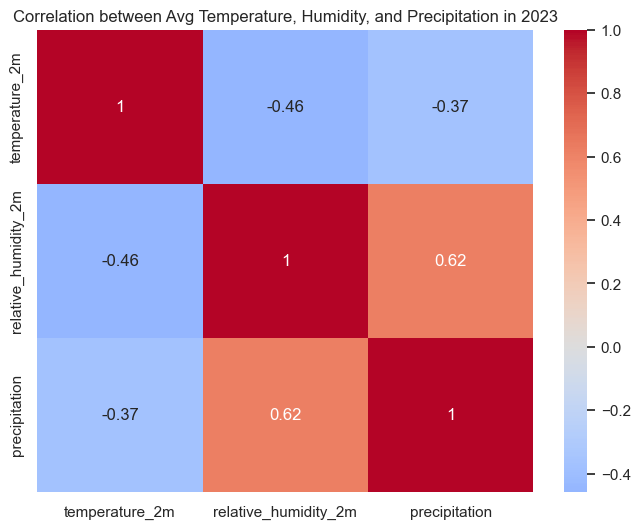

In [171]:
#Draw a line chart to show the correlation between temperature and precipitation and humidity in 2023


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame
data = pd.read_csv('data.csv', parse_dates=['date'])

# Filter for 2023 data only
data_2023 = data[data['date'].dt.year == 2023]

# Calculate the average temperature, humidity, and precipitation by day
data_2023_daily = data_2023.resample('D', on='date').mean()[['temperature_2m', 'relative_humidity_2m', 'precipitation']]

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
correlation = data_2023_daily.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Avg Temperature, Humidity, and Precipitation in 2023')
plt.show()




The heatmap illustrates the correlation coefficients between three variables: temperature (temperature_2m), humidity (relative_humidity_2m), and precipitation in 2023. The correlation coefficient ranges from -1 to 1, indicating the strength and direction of the relationship between two variables.

1.Temperature and Humidity: The correlation coefficient between temperature and humidity is -0.46, indicating a moderate inverse relationship. As temperature increases, humidity tends to decrease. This is a common phenomenon since warmer air can hold more moisture, thus lowering the relative humidity.

2.Temperature and Precipitation: The correlation coefficient here is -0.37, showing a weak inverse relationship. As temperature rises, precipitation tends to decrease slightly, although the relationship is not strong, likely because precipitation is influenced by various other factors beyond temperature alone.

3.Humidity and Precipitation: The correlation coefficient between humidity and precipitation is 0.62, suggesting a moderate positive relationship. This is logical because high humidity levels increase the likelihood of condensation, leading to rain.

Summary:
The strongest correlation is observed between humidity and precipitation (0.62), indicating a fairly significant connection. The relationship between temperature and humidity is also notable, with a moderate inverse correlation of -0.46. Overall, temperature, humidity, and precipitation are interconnected but not strongly correlated, suggesting that these variables are influenced by other meteorological factors.

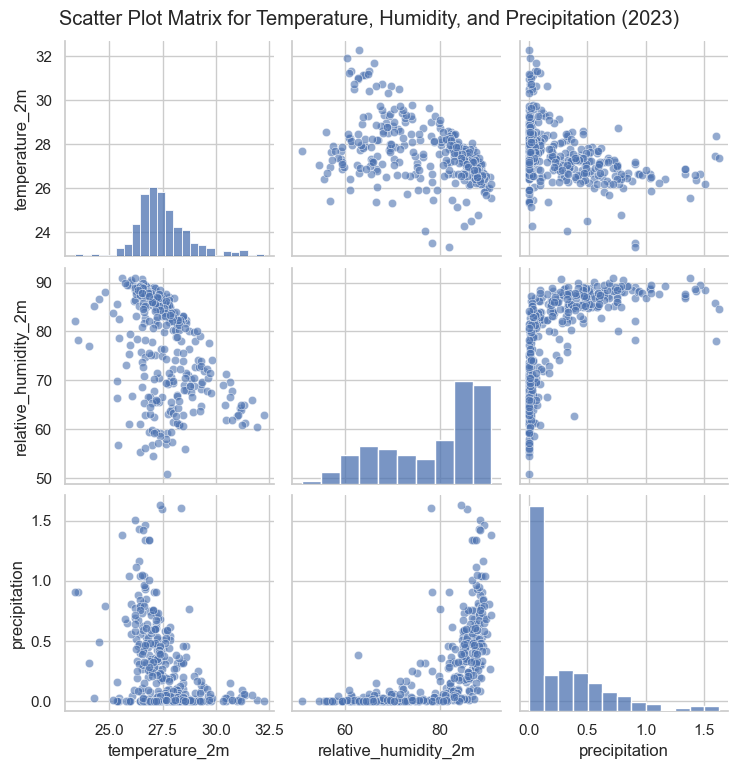

In [172]:
# Scatter plot matrix for visual inspection
sns.pairplot(data_2023_daily, kind='scatter', plot_kws={'alpha':0.6})
plt.suptitle('Scatter Plot Matrix for Temperature, Humidity, and Precipitation (2023)', y=1.02)
plt.show()

In the scatter plot matrix above, three factors are analyzed: temperature_2m (temperature at 2 meters), relative_humidity_2m (relative humidity at 2 meters), and precipitation (rainfall). Here are some observations on the relationships among these factors:

1.Relationship between Temperature and Relative Humidity:
    There is a noticeable inverse relationship. As temperature rises, relative humidity tends to decrease. This makes sense since warmer air can hold more water vapor, which reduces relative humidity.

2.Relationship between Temperature and Precipitation:
    The scatter plot shows no clear relationship between temperature and precipitation. Precipitation values are primarily clustered at low levels, indicating that, most of the time, rainfall is 
    minimal or there is no rain.

3.Relationship between Humidity and Precipitation:

    There is a gradual increase in precipitation as relative humidity rises. When humidity levels are higher (around 80-90%), rainfall tends to increase, likely because more humid air is more conducive to rainfall.
4.Distribution of Factors:

    +The temperature distribution is skewed toward higher temperatures (around 25°C to 32°C).
    +Humidity is relatively evenly distributed between 50% and 90%.
    +Precipitation is mostly concentrated at low levels, indicating many dry or light-rain days.
In summary, temperature and relative humidity exhibit an inverse relationship, while humidity and precipitation show a slight positive correlation as humidity reaches higher levels.

## Model Training


In [158]:
from statsmodels.tsa.stattools import adfuller
target_variable = 'temperature_2m'
df = pd.read_csv('data.csv')
train_size = int(len(data) * 0.8)


In [159]:
train_data = data[target_variable][:train_size]
test_data = data[target_variable][train_size:]

train_data.shape,test_data.shape

((210412,), (52604,))

In [160]:
daily_train_data = train_data.resample('D').mean()

adf_result = adfuller(daily_train_data.dropna())
r = adf_result

print('ADF Statistic: {}'.format(r[0]))
print('p-value: {}'.format(r[1]))
print('Critical Values:')
for key, value in r[4].items():
    print('\t{}: {}'.format(key, value))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [38]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
monthly_train_data = train_data.resample('M').mean()

monthly_train_data.head()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

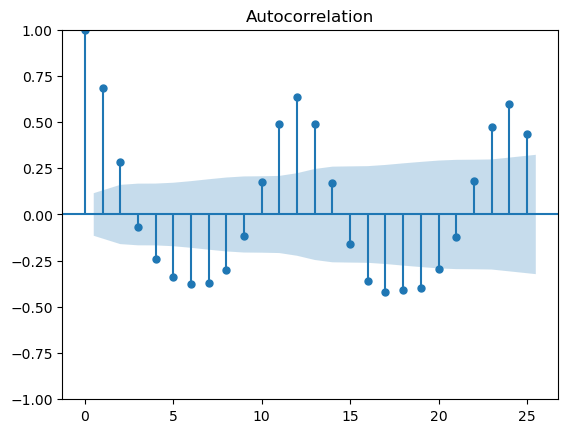

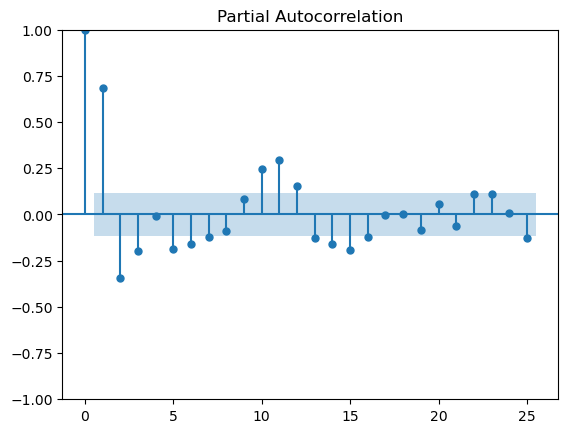

In [39]:
plot_acf(monthly_train_data) 
plot_pacf(monthly_train_data) 
plt.show()

Mean Absolute Error: 0.610350263761251


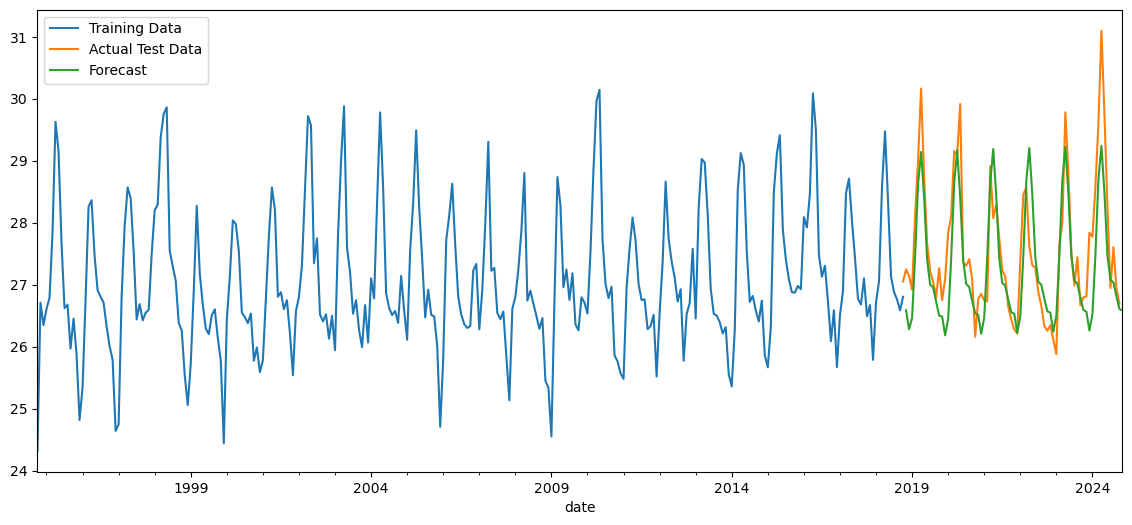

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Define the order and seasonal order based on auto_arima output
monthly_train_data = monthly_train_data.resample('M').mean()
test_data = test_data.resample('M').mean()

# Define the order and seasonal order based on auto_arima output
order = (2, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model with optimal parameters
sarima_model = SARIMAX(monthly_train_data, order=order, seasonal_order=seasonal_order,
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()


# Forecast for the length of the test set
forecast = sarima_results.forecast(steps=len(test_data))

# Evaluate with Mean Absolute Error (MAE)
mae = np.mean(np.abs(forecast.values - test_data.values))
print(f'Mean Absolute Error: {mae}')

# Plot the forecast vs actual
plt.figure(figsize=(14, 6))
monthly_train_data.plot(label='Training Data')
test_data.plot(label='Actual Test Data')
forecast.plot(label='Forecast')
plt.legend()
plt.show()

In [41]:
import pickle

# Save the SARIMA model to a file
with open('sarima_model.pkl', 'wb') as f:
    pickle.dump(sarima_results, f)

print("Model saved successfully!")

Model saved successfully!


In [43]:
# Load the SARIMA model
with open('sarima_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to forecast
new_forecast = loaded_model.forecast(steps=len(test_data))  # Adjust steps as needed
print(new_forecast)

2018-11-30 00:00:00+00:00    26.586950
2018-12-31 00:00:00+00:00    26.280608
2019-01-31 00:00:00+00:00    26.462427
2019-02-28 00:00:00+00:00    27.450660
2019-03-31 00:00:00+00:00    28.633378
                               ...    
2024-07-31 00:00:00+00:00    27.081644
2024-08-31 00:00:00+00:00    27.033410
2024-09-30 00:00:00+00:00    26.808345
2024-10-31 00:00:00+00:00    26.607269
2024-11-30 00:00:00+00:00    26.582663
Freq: M, Name: predicted_mean, Length: 73, dtype: float64
